In [134]:
import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb


from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
importlib.reload(tensorflow)

<module 'tensorflow' from '/miniconda/lib/python3.6/site-packages/tensorflow/__init__.py'>

In [121]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    NOTE: Taken from sklearn example
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    
    #ax.figsize((10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [36]:
tqdm.pandas()

In [37]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [4]:
import sys

In [ ]:
!{sys.executable} -m list

### Get postive samples

In [38]:
drugbank = pkl.load(open('data/drugbank_embds.pkl', 'rb'))

In [39]:
drugbank

,drug_cas,drug_id,drug_name,target_actions,target_amino,target_gene,target_id,target_name,target_organism,pubchem_id,pubchem_name,target_gene_fingerprint,drug_fingerprint
31,128270-60-0,DB00006,Bivalirudin,[inhibitor],>lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...,>lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...,BE0000048,Prothrombin,Human,16129704,Bivalirudin,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.10044218 0.18559723 -0.12865402 -0.0650997 ...
53,65807-02-5,DB00014,Goserelin,[agonist],>lcl|BSEQ0036957|Lutropin-choriogonadotropic h...,>lcl|BSEQ0010174|Lutropin-choriogonadotropic h...,BE0000134,Lutropin-choriogonadotropic hormone receptor,Human,5311128,goserelin,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.1331214 0.2391842 -0.14361311 -0.14107014 0...
54,65807-02-5,DB00014,Goserelin,[agonist],>lcl|BSEQ0000405|Gonadotropin-releasing hormon...,>lcl|BSEQ0018926|Gonadotropin-releasing hormon...,BE0000203,Gonadotropin-releasing hormone receptor,Human,5311128,goserelin,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.1331214 0.2391842 -0.14361311 -0.14107014 0...
131,16679-58-6,DB00035,Desmopressin,[agonist],>lcl|BSEQ0000583|Vasopressin V2 receptor\nMLMA...,>lcl|BSEQ0010065|Vasopressin V2 receptor (AVPR...,BE0000293,Vasopressin V2 receptor,Human,16051933,DESMOPRESSIN,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.051722348 0.24374117 -0.16236018 -0.1723347...
132,16679-58-6,DB00035,Desmopressin,NaN,>lcl|BSEQ0009979|Vasopressin V1a receptor\nMRL...,>lcl|BSEQ0009980|Vasopressin V1a receptor (AVP...,BE0000165,Vasopressin V1a receptor,Human,16051933,DESMOPRESSIN,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.051722348 0.24374117 -0.16236018 -0.1723347...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,197922-42-2,DB08900,Teduglutide,[agonist],>lcl|BSEQ0011545|Glucagon-like peptide 2 recep...,>lcl|BSEQ0011546|Glucagon-like peptide 2 recep...,BE0002134,Glucagon-like peptide 2 receptor,Human,16139605,Teduglutide,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.15734409 0.22184908 -0.10869281 -0.08885931...
440,782500-75-8,DB09043,Albiglutide,[agonist],>lcl|BSEQ0010605|Glucagon-like peptide 1 recep...,>lcl|BSEQ0010606|Glucagon-like peptide 1 recep...,BE0000857,Glucagon-like peptide 1 receptor,Human,122173812,Albiglutide,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.15686676 0.2130656 -0.10459428 -0.094190985...
457,8063-17-0,DB09363,Rauwolfia serpentina root,[inhibitor],>lcl|BSEQ0000236|Synaptic vesicular amine tran...,>lcl|BSEQ0009946|Synaptic vesicular amine tran...,BE0000118,Synaptic vesicular amine transporter,Human,441975,Ajmalicine,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.055649024 0.22807583 -0.18862249 -0.1470914...
460,844439-96-9,DB09564,Insulin Degludec,[ligand],>lcl|BSEQ0036940|Insulin receptor\nMATGGRRGAAA...,>lcl|BSEQ0020443|Insulin receptor (INSR)\nATGG...,BE0000033,Insulin receptor,Human,118984462,Insulin degludec,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.077604994 0.26912978 -0.12892634 -0.1319705...


In [40]:
drugbank['target_gene_code'] = drugbank['target_gene'].apply(lambda x: ''.join(list(x.split('\n')[1:])))
#drugbank['target_amino_code'] = drugbank['target_amino'].apply(lambda x: ''.join(list(x.split('\n')[1:])))

In [41]:
with open ('data/chem_cid_SMILE_fngr_vector_fngr.pickle', 'rb') as f:
    smiles_df = pkl.load(f)
    
smiles_df['cid'] = smiles_df['cid'].astype(int)
drugbank = pd.merge(smiles_df, drugbank, right_on = 'pubchem_id', left_on = 'cid', how = 'right')

In [42]:
drugbank = drugbank[['drug_id', 'target_id', 'fingerprint', 'target_gene_code']]
drugbank = drugbank[~ drugbank['fingerprint'].isna()]
drugbank = drugbank.rename(columns = {'fingerprint': 'drug_fingerprint_code', 'target_id': 'gene_id'})

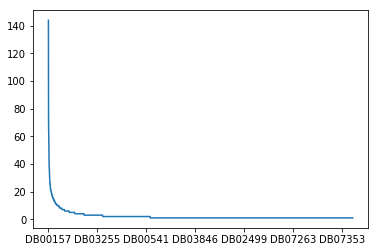

In [43]:
drugbank['drug_id'].value_counts().plot()

## NOTE: Why does NAD Bind to so many molecules?

In [44]:
drugbank[drugbank['drug_id'] == 'DB00157']

,drug_id,gene_id,drug_fingerprint_code,target_gene_code
7833,DB00157,BE0000645,2968968094 4140259565 3218693969 2070178920 32...,ATGTTTGAAATTAAGAAGATCTGTTGCATCGGTGCAGGCTATGTTG...
7834,DB00157,BE0000227,2968968094 4140259565 3218693969 2070178920 32...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...
7835,DB00157,BE0000299,2968968094 4140259565 3218693969 2070178920 32...,ATGGCGGCGGCGGCCAAGCCCAACAACCTTTCCCTGGTGGTGCACG...
7836,DB00157,BE0000360,2968968094 4140259565 3218693969 2070178920 32...,ATGGGCACCAAGGGCAAAGTTATTAAATGCAAAGCAGCCATCGCCT...
7837,DB00157,BE0000465,2968968094 4140259565 3218693969 2070178920 32...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...
...,...,...,...,...
7972,DB00157,BE0000096,2968968094 4140259565 3218693969 2070178920 32...,ATGCCAAGATGGTATTTTCTTTTGGCAAGATGCTTTGGTTGTGCAG...
7973,DB00157,BE0000735,2968968094 4140259565 3218693969 2070178920 32...,ATGGAGCGTCCGCAACCCGACAGCATGCCCCAGGATTTGTCAGAGG...
7974,DB00157,BE0000587,2968968094 4140259565 3218693969 2070178920 32...,ATGTCAGCGGAAGTGGAAACCTCAGAGGGGGTAGACGAGTCAGAAA...
7975,DB00157,BE0000344,2968968094 4140259565 3218693969 2070178920 32...,ATGTGGGAGCTCGTGGCTCTCTTGCTGCTTACCCTAGCTTATTTGT...


### Get DrugID -> Fingerprint mapping from positive samples

In [45]:
drug_map = drugbank[['drug_id', 'drug_fingerprint_code']].drop_duplicates('drug_id').set_index('drug_id')
target_map = drugbank[['gene_id', 'target_gene_code']].drop_duplicates('gene_id').set_index('gene_id')

In [46]:
negative_df = pd.read_csv('data/negative_samples_thrsh_12')[['node_0','node_1','shortest_path']] 
negative_df = negative_df.rename(columns = {'node_0': 'drug_id', 'node_1': 'gene_id'})
negative_df = negative_df[negative_df['drug_id'].str.contains('DB') & negative_df['gene_id'].str.contains('BE')]

In [47]:
negative_df = pd.merge(negative_df, drug_map, left_on = 'drug_id', right_index = True, how = 'left')
negative_df = pd.merge(negative_df, target_map, left_on = 'gene_id', right_index = True, how = 'left')

In [48]:
negative_df

,drug_id,gene_id,shortest_path,drug_fingerprint_code,target_gene_code
1,DB04481,BE0002266,12.0,2245384272 4022716898 2245273601 1735424888 22...,ATGGCGACCTCCACGGGTCGCTGGCTTCTCCTCCGGCTTGCACTAT...
3,DB04481,BE0000206,13.0,2245384272 4022716898 2245273601 1735424888 22...,ATGTTTGACTGTATGGATGTTCTGTCAGTGAGTCCTGGGCAAATCC...
4,DB04481,BE0002401,13.0,2245384272 4022716898 2245273601 1735424888 22...,ATGGCAGCAGACCTGGGCCCCTGGAATGACACCATCAATGGCACCT...
6,DB04481,BE0004180,13.0,2245384272 4022716898 2245273601 1735424888 22...,ATGACGGAAAACAAAGGATCTTCTCAGCCTAAGAAAAACGGTAATA...
10,DB04481,BE0002840,12.0,2245384272 4022716898 2245273601 1735424888 22...,ATGAAATTTCTTCTGGACATCCTCCTGCTTCTCCCGTTACTGATCG...
...,...,...,...,...,...
1745404,DB01260,BE0003634,12.0,2246728737 1861965050 2976816164 2446814304 31...,ATGTTGTTCTCCGCCCTCCTGCTGGAGGTGATTTGGATCCTGGCTG...
1745410,DB01134,BE0003634,14.0,2246728737 1861965050 2976816164 778974661 296...,ATGTTGTTCTCCGCCCTCCTGCTGGAGGTGATTTGGATCCTGGCTG...
1745423,DB08040,BE0002410,12.0,2246728737 3537119515 2245273601 2637439965 22...,ATGAAAGTTGGAGTGCTGTGGCTCATTTCTTTCTTCACCTTCACTG...
1745424,DB01105,BE0002410,13.0,2246728737 3537119515 2245273601 2423543607 22...,ATGAAAGTTGGAGTGCTGTGGCTCATTTCTTTCTTCACCTTCACTG...


#### Note: Around 13% of negative samples don't match a drug id. Since the number is small, we ignore it for now

In [49]:
len(negative_df[(negative_df['target_gene_code'].isna()) |
                (negative_df['drug_fingerprint_code'].isna())])/len(negative_df)

negative_df = negative_df[(~ negative_df['target_gene_code'].isna()) &
                (~ negative_df['drug_fingerprint_code'].isna())]

In [50]:
negative_df['Y'] = 0
drugbank['Y'] = 1
drugbank = drugbank.append(negative_df.sample(int(len(drugbank)*5))) ## NUMBER OF NEGATIVE SAMPLES TO PICK
drugbank = drugbank.drop('shortest_path', axis = 1)

/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
drugbank[drugbank['target_gene_code'].str.contains('S').isna()]

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y


In [52]:
drugbank = drugbank[~ drugbank['drug_fingerprint_code'].str.contains('n')]

#### The dataset is clean and balanced

In [53]:
drugbank['Y'].value_counts()/len(drugbank)

0    0.83331
1    0.16669
Name: Y, dtype: float64

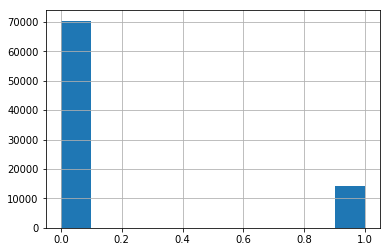

In [54]:
drugbank['Y'].hist()

#### Preprocessing fingerprints to feed to CNN

In [55]:
label_encoder = LabelEncoder()
label_encoder.fit(list(drugbank['target_gene_code'].iloc[0]))

with open('data/gene_encoder.pkl', 'wb') as f:
    pkl.dump(label_encoder, f)
    
gene_chars = set(list(drugbank['target_gene_code'].iloc[0]))

drugbank['target_gene_encoded'] = drugbank['target_gene_code'].progress_apply(\
                                   lambda x: label_encoder.transform([i for i in list(x) if i in gene_chars]))
drugbank['drug_fingerprint_encoded'] = drugbank['drug_fingerprint_code'].progress_apply(lambda x: [int(i) for i in x.replace(' ', '')])

In [56]:
drugbank.head()

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded
0,DB03313,BE0001349,2246728737 3545365497 2246699815 2664995851 86...,ATGGTCTCAGGAACGGTGGGCAGAGGTACGGCGCTGGGCGCGGTGC...,1,"[0, 3, 2, 2, 3, 1, 3, 1, 0, 2, 2, 0, 0, 1, 2, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
1,DB03313,BE0004335,2246728737 3545365497 2246699815 2664995851 86...,ATGCAAAATCAATTAAATGAATTAAAACGAAAAATGCTGGAATTTT...,1,"[0, 3, 2, 1, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
2,DB03313,BE0004290,2246728737 3545365497 2246699815 2664995851 86...,ATGAACAAACCAACGATTCTGCGCCTAATCAAGTATCTGAGCATTA...,1,"[0, 3, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
3,DB03313,BE0003624,2246728737 3545365497 2246699815 2664995851 86...,ATGAGACTGATTTGTATGAGAAAATTTAACAGCCATTCGATTCCGA...,1,"[0, 3, 2, 0, 2, 0, 1, 3, 2, 0, 3, 3, 3, 2, 3, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
4,DB03313,BE0004644,2246728737 3545365497 2246699815 2664995851 86...,ATGAAATTAGATAAATTATTTGAGAAATTTCTTTCTCTTTTTAAAA...,1,"[0, 3, 2, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."


#### Calculate length mismatches and pad

In [57]:
drugbank['target_gene_encoded_len'] = drugbank['target_gene_encoded']\
                                    .apply(lambda x: len(x))
drugbank['drug_fingerprint_encoded_len'] = drugbank['drug_fingerprint_encoded']\
                                    .apply(lambda x: len(x))

In [58]:
drugbank['mismatch'] = drugbank[['target_gene_encoded', 'drug_fingerprint_encoded']]\
                        .apply(lambda x: len(x['target_gene_encoded']) - len(x['drug_fingerprint_encoded']), axis = 1)

## Most Genes are longer than fingerprints

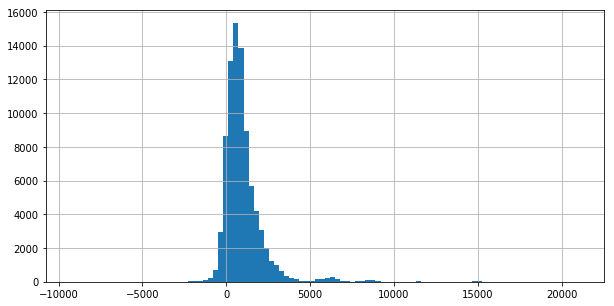

In [59]:
drugbank['mismatch'].hist(bins = 100, figsize = (10, 5))

In [60]:
print('95 percent of the mismatches are of the range %f to %f' % (max(drugbank['mismatch'].value_counts()) - np.std(drugbank['mismatch'].value_counts()),
                                                           max(drugbank['mismatch'].value_counts()) + np.std(drugbank['mismatch'].value_counts())))

95 percent of the mismatches are of the range 64.439060 to 97.560940


In [61]:
max_target_gene_encoded_len = max(drugbank['target_gene_encoded_len'])
max_drug_fingerprint_encoded_len = max(drugbank['drug_fingerprint_encoded_len'])

In [62]:
drugbank['target_gene_encoded_mismatch'] = max_target_gene_encoded_len - drugbank['target_gene_encoded_len']

In [63]:
drugbank['drug_fingerprint_encoded_mismatch'] = max_drug_fingerprint_encoded_len - drugbank['drug_fingerprint_encoded_len'] 

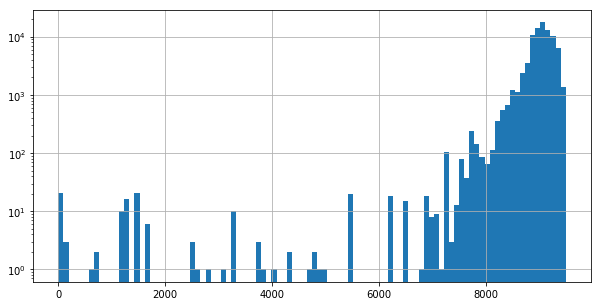

In [64]:
drugbank['drug_fingerprint_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

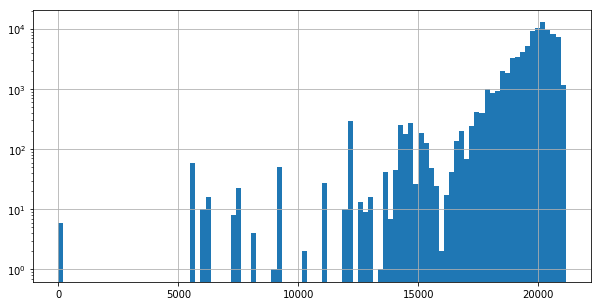

In [65]:
drugbank['target_gene_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

#### There appears to be quite large intracolumn mismatches in length. Unsure how to deal with it now. Current strategy is to pad the inputs and model it

In [66]:
drugbank['target_gene_encoded_padded'] = drugbank[['target_gene_encoded','target_gene_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['target_gene_encoded_mismatch']/2))] +   
                                                        list(x['target_gene_encoded']) +
                                                        ['-1' for i in range (int(x['target_gene_encoded_mismatch']/2))]
                                                        , axis = 1)
drugbank['target_gene_encoded_padded'] = drugbank['target_gene_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_target_gene_encoded_len else x)

In [67]:
drugbank['drug_fingerprint_encoded_padded'] = drugbank[['drug_fingerprint_encoded','drug_fingerprint_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['drug_fingerprint_encoded_mismatch']/2))] +   
                                                        list(x['drug_fingerprint_encoded']) +
                                                        ['-1' for i in range (int(x['drug_fingerprint_encoded_mismatch']/2))]
                                                        , axis = 1)

drugbank['drug_fingerprint_encoded_padded'] = drugbank['drug_fingerprint_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_drug_fingerprint_encoded_len else x)

In [69]:
drugbank.sort_values('Y')

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded,target_gene_encoded_len,drug_fingerprint_encoded_len,mismatch,target_gene_encoded_mismatch,drug_fingerprint_encoded_mismatch,target_gene_encoded_padded,drug_fingerprint_encoded_padded
1279543,DB02704,BE0004010,2968968094 1824088295 2976033787 1228528465 29...,ATGCATTTAAATCCAGCAGAGAAAGAAAAATTACAAATTTTTCTAG...,0,"[0, 3, 2, 1, 0, 3, 3, 3, 0, 0, 0, 3, 1, 1, 0, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 1, 8, 2, 4, 0, ...",303,916,-613,20919,8585,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
792055,DB06684,BE0001790,2968968094 2803848648 2968968094 2803848648 20...,ATGGAAATTAATGTGAGTAAATTAAGAACAGATTTGCCTCAAGTCG...,0,"[0, 3, 2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 2, 3, 2, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 8, 0, 3, 8, ...",957,644,313,20265,8857,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
742897,DB03811,BE0001167,3218693969 3777168895 3217380708 3585958780 21...,ATGCCAAACTACAAACTCACTTATTTTAATATGAGGGGGAGAGCAG...,0,"[0, 3, 2, 1, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, ...","[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 3, 7, 7, 7, 1, ...",600,195,405,20622,9306,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
886712,DB02095,BE0004952,3218693969 98513984 3218693969 98513984 321869...,ATGATCATCTTAATTTACTTATTTCTCTTGCTATGGGAAGACACTC...,0,"[0, 3, 2, 0, 3, 1, 0, 3, 1, 3, 3, 0, 0, 3, 3, ...","[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 9, 8, 5, 1, 3, ...",834,207,627,20388,9294,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
423507,DB03698,BE0002359,2246728737 3542456614 2245384272 1173125914 22...,ATGATGATGATGATGATGATGAAAAAAATGCAGCATCAACGGCAGC...,0,"[0, 3, 2, 0, 3, 2, 0, 3, 2, 0, 3, 2, 0, 3, 2, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",6546,1216,5330,14676,8285,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9379,DB08280,BE0000329,2246728737 3537123720 2245277810 2442433719 22...,ATGGCTTTTATGAAAAAATATCTCCTCCCCATTCTGGGGCTCTTCA...,1,"[0, 3, 2, 2, 1, 3, 3, 3, 3, 0, 3, 2, 0, 0, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",879,544,335,20343,8957,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9378,DB04113,BE0000465,2968968094 2142032900 2968968094 2142032900 29...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...,1,"[0, 3, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 4, 2, 0, ...",1128,158,970,20094,9343,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9377,DB08198,BE0001852,2246728737 422715066 3217380708 4247217172 321...,ATGGCGTCGCAGCCAAATTCGTCTGCGAAGAAGAAAGAGGAGAAGG...,1,"[0, 3, 2, 2, 1, 2, 3, 1, 2, 1, 0, 2, 1, 1, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",3171,460,2711,18051,9041,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9388,DB09076,BE0000560,2968968094 2119439498 2968968094 1653789098 21...,ATGAATAACTCAACAAACTCCTCTAACAATAGCCTGGCTCTTACAA...,1,"[0, 3, 2, 0, 0, 3, 0, 0, 1, 3, 1, 0, 0, 1, 0, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 1, 9, 4, ...",1401,612,789,19821,8889,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


In [70]:
drugbank.sort_values('Y').reset_index(drop=True).to_csv('data/intermediate/interactions_preprocessed.csv', index = False)